In [2]:
pip install rasterio numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 43200, 'height': 15000, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.008333333333333333, 0.0, -180.0,
       0.0, -0.008333333333333333, 65.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


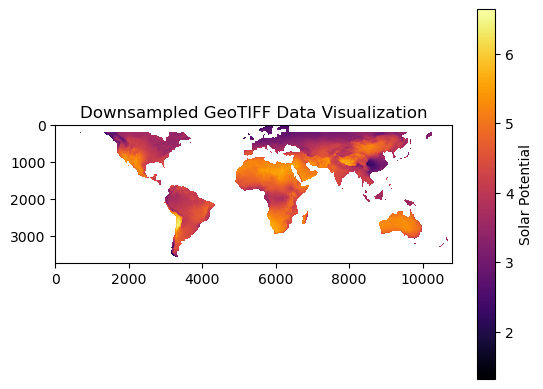

In [3]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt

# Load GeoTIFF with downsampling
geo_tiff_path = "/Users/shanes/Downloads/World_PVOUT_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif"

with rasterio.open(geo_tiff_path) as src:
    scale_factor = 4  # Adjust this for more compression (higher = more downsampling)

    new_width = src.width // scale_factor
    new_height = src.height // scale_factor

    geo_data = src.read(
        1,
        out_shape=(new_height, new_width),
        resampling=Resampling.bilinear
    )

    profile = src.profile

# Print Metadata
print(profile)

# Visualize
plt.imshow(geo_data, cmap='inferno')
plt.colorbar(label='Solar Potential')
plt.title('Downsampled GeoTIFF Data Visualization')
plt.show()

In [5]:
import pandas as pd

# Get coordinates
transform = src.transform
rows, cols = geo_data.shape
lats = [transform[5] * i + transform[2] for i in range(rows)]
lons = [transform[0] * j + transform[2] for j in range(cols)]
lons, lats = np.meshgrid(lons, lats)

# Flatten arrays
flat_lons = lons.flatten()
flat_lats = lats.flatten()
flat_values = geo_data.flatten()

# Save to CSV
df = pd.DataFrame({'Longitude': flat_lons, 'Latitude': flat_lats, 'SolarPotential': flat_values})
df.to_csv('solar_data.csv', index=False)

print("CSV Saved: solar_data.csv")

CSV Saved: solar_data.csv


In [7]:
import pandas as pd

# Load CSV
df = pd.read_csv("solar_data.csv")

# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500000 entries, 0 to 40499999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Longitude       float64
 1   Latitude        float64
 2   SolarPotential  float64
dtypes: float64(3)
memory usage: 927.0 MB
None
          Longitude      Latitude  SolarPotential
count  4.050000e+07  4.050000e+07    1.103730e+07
mean  -1.350042e+02  1.216625e+05    4.223019e+00
std    2.598076e+01  7.036456e+04    7.549046e-01
min   -1.800000e+02 -1.800000e+02    1.315750e+00
25%   -1.575021e+02  6.072500e+04    3.683500e+00
50%   -1.350042e+02  1.216625e+05    4.237125e+00
75%   -1.125063e+02  1.826000e+05    4.830062e+00
max   -9.000833e+01  2.435050e+05    6.642750e+00
Longitude                0
Latitude                 0
SolarPotential    29462704
dtype: int64


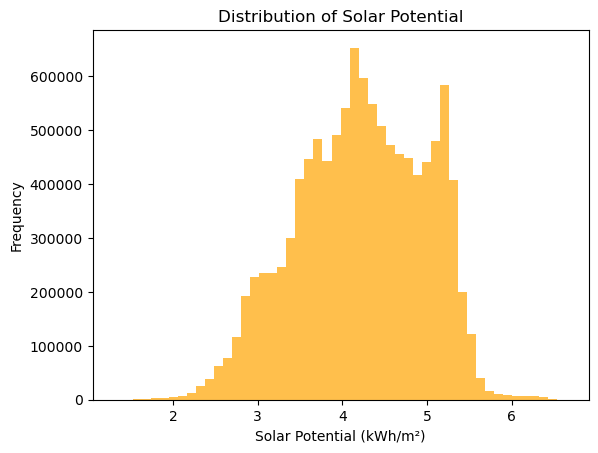

In [9]:
import matplotlib.pyplot as plt

# Histogram of Solar Potential
plt.hist(df['SolarPotential'], bins=50, color='orange', alpha=0.7)
plt.xlabel("Solar Potential (kWh/m²)")
plt.ylabel("Frequency")
plt.title("Distribution of Solar Potential")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


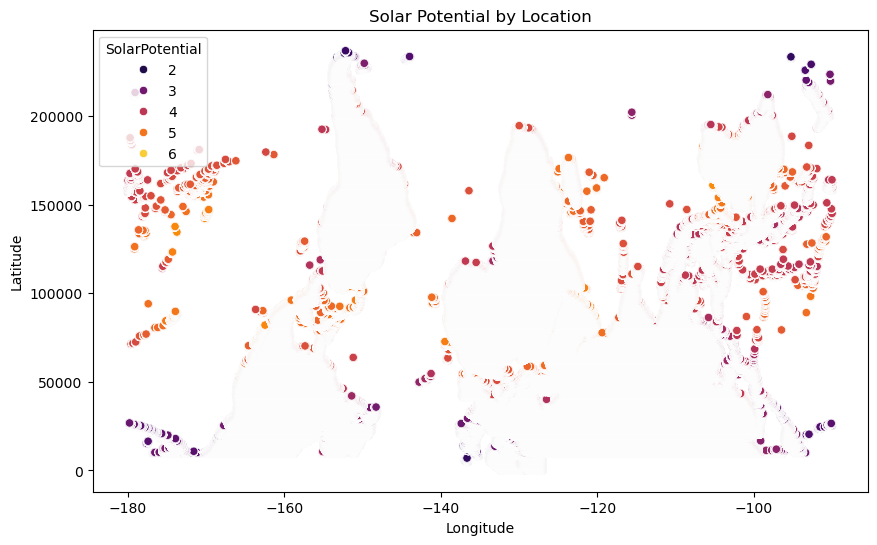

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue=df["SolarPotential"], palette="inferno")
plt.title("Solar Potential by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [13]:
# Fill missing Solar Potential values with median
df['SolarPotential'].fillna(df['SolarPotential'].median(), inplace=True)

# Drop rows if Latitude or Longitude is missing
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

print("Missing values handled!")

/var/folders/18/dpnmnwsj0nz74sltb7rw_9380000gn/T/ipykernel_5630/2709180685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SolarPotential'].fillna(df['SolarPotential'].median(), inplace=True)


Missing values handled!


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['SolarPotential_Scaled'] = scaler.fit_transform(df[['SolarPotential']])

print("Data Normalized!")

Data Normalized!


In [17]:
import numpy as np

# Convert Latitude & Longitude into Radians
df['Lat_Radians'] = np.radians(df['Latitude'])
df['Lon_Radians'] = np.radians(df['Longitude'])

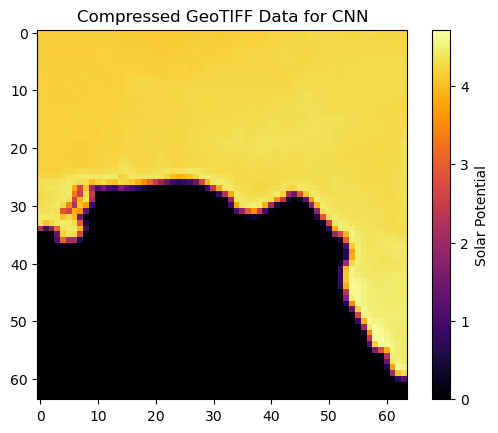

✅ Processing complete! Data saved as solar_data.npy


In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load GeoTIFF
geo_tiff_path = "/Users/shanes/Downloads/World_PVOUT_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif"
with rasterio.open(geo_tiff_path) as src:
    geo_data = src.read(1)  # Read first band
    geo_data = np.nan_to_num(geo_data)  # Handle NaN values

# Select a smaller region (e.g., center 1024x1024 patch)
rows, cols = geo_data.shape
start_row, start_col = rows // 4, cols // 4  # Adjust based on dataset size
end_row, end_col = start_row + 1024, start_col + 1024  # Extract 1024x1024 patch
geo_data_cropped = geo_data[start_row:end_row, start_col:end_col]

# Downsample to 64x64 for CNN
from skimage.transform import resize
geo_data_resized = resize(geo_data_cropped, (64, 64), anti_aliasing=True)

# Save NumPy Array
np.save("solar_data.npy", geo_data_resized)

# Visualize
plt.imshow(geo_data_resized, cmap='inferno')
plt.colorbar(label='Solar Potential')
plt.title('Compressed GeoTIFF Data for CNN')
plt.show()

print("✅ Processing complete! Data saved as solar_data.npy")

In [21]:
import numpy as np

# Load the preprocessed NumPy array
X_train = np.load("solar_data.npy").reshape(-1, 64, 64, 1)  # Reshape for CNN
y_train = np.mean(X_train, axis=(1, 2, 3))  # Example target values

print("✅ Data Loaded:", X_train.shape)

✅ Data Loaded: (1, 64, 64, 1)


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear')  # Regression output
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,452,225 (9.35 MB)

 Trainable params: 2,452,225 (9.35 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
import rasterio
import numpy as np
from skimage.util.shape import view_as_windows

# Load GeoTIFF
geo_tiff_path = "/Users/shanes/Downloads/World_PVOUT_GISdata_LTAy_AvgDailyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif"
with rasterio.open(geo_tiff_path) as src:
    geo_data = src.read(1)  # Read first band
    geo_data = np.nan_to_num(geo_data)  # Handle NaN values

# Define patch size & step (stride)
patch_size = 64  # Patch size for CNN
step = 32  # Overlapping step to ensure more samples

# Extract overlapping patches using sliding window
patches = view_as_windows(geo_data, (patch_size, patch_size), step)
num_patches = patches.shape[0] * patches.shape[1]

# Reshape for CNN input
X_train = patches.reshape(num_patches, patch_size, patch_size, 1)
y_train = np.mean(X_train, axis=(1,2,3))  # Mean solar potential per patch

print("✅ Extracted", X_train.shape[0], "patches for training!")

✅ Extracted 629983 patches for training!


In [29]:
history = model.fit(X_train, y_train, epochs=5, batch_size=8, validation_split=0.2)

Epoch 1/5
62999/62999 ━━━━━━━━━━━━━━━━━━━━ 981s 16ms/step - loss: 0.0088 - mae: 0.0297 - val_loss: 1.5942e-04 - val_mae: 0.0040
Epoch 2/5
62999/62999 ━━━━━━━━━━━━━━━━━━━━ 1033s 16ms/step - loss: 0.0012 - mae: 0.0167 - val_loss: 6.1238e-05 - val_mae: 0.0035
Epoch 3/5
62999/62999 ━━━━━━━━━━━━━━━━━━━━ 995s 16ms/step - loss: 8.2624e-04 - mae: 0.0141 - val_loss: 1.4531e-04 - val_mae: 0.0073
Epoch 4/5
62999/62999 ━━━━━━━━━━━━━━━━━━━━ 1069s 17ms/step - loss: 5.9558e-04 - mae: 0.0123 - val_loss: 1.4252e-05 - val_mae: 0.0012
Epoch 5/5
62999/62999 ━━━━━━━━━━━━━━━━━━━━ 1099s 17ms/step - loss: 5.2304e-04 - mae: 0.0116 - val_loss: 3.8692e-04 - val_mae: 0.0039


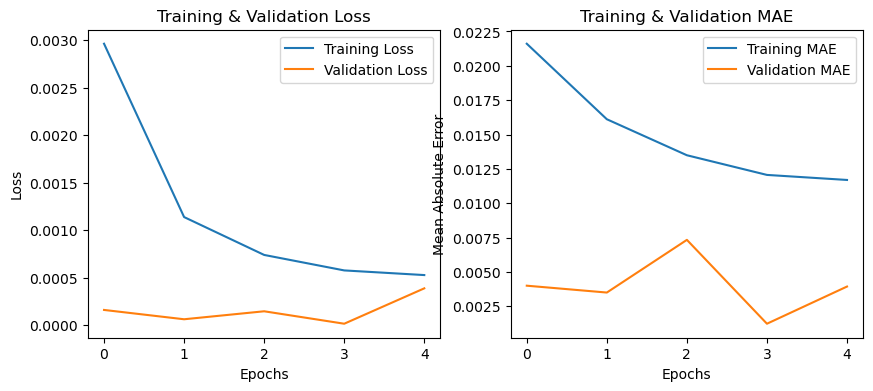

In [31]:
import matplotlib.pyplot as plt  

# Extract history
history_dict = history.history  # Assuming `history` is the training output

# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict.get('val_loss', []), label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history_dict['mae'], label='Training MAE')
plt.plot(history_dict.get('val_mae', []), label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training & Validation MAE')

plt.show()

In [41]:
print(locals().keys())  # Lists all available variables

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', '_i2', 'json', 'getpass', 'hashlib', 'import_pandas_safely', '__pandas', 'is_data_frame', 'dataframe_columns', 'dtypes_str', 'dataframe_hash', 'get_dataframes', '_2', '_i3', 'rasterio', 'Resampling', 'np', 'plt', 'geo_tiff_path', 'src', 'scale_factor', 'new_width', 'new_height', 'geo_data', 'profile', '_i4', '_4', '_i5', 'pd', 'transform', 'rows', 'cols', 'lats', 'lons', 'flat_lons', 'flat_lats', 'flat_values', 'df', '_i6', '_6', '_i7', '_i8', '_8', '_i9', '_i10', '_10', '_i11', 'sns', '_i12', '_12', '_i13', '_i14', '_14', '_i15', 'MinMaxScaler', 'scaler', '_i16', '_16', '_i17', '_i18', '_18', '_i19', 'start_row', 'start_col', 'end_row', 'end_col', 'geo_data_cropped', 'resize', 'geo_data_resized', '_i20', '_20', '_i21', 'X_train', 'y_train', '_i22', 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (503986, 64, 64, 1)
X_test shape: (125997, 64, 64, 1)
y_train shape: (503986,)
y_test shape: (125997,)


In [47]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

3938/3938 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 0.0037 - mae: 0.0313
Test Loss: 0.0037, Test MAE: 0.0312


In [49]:
!pip install shap

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 64, 64, 1))']
  warnings.warn(msg)


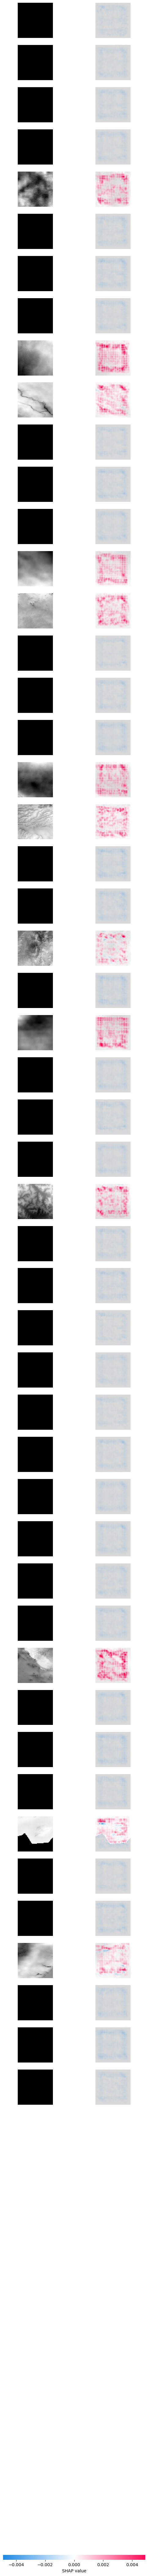

In [55]:
import shap
import numpy as np

# Select a small batch of images for explanation (to avoid memory issues)
X_sample = X_test[:50]  # Reduce size for efficiency

# Create an explainer for deep learning models
explainer = shap.GradientExplainer(model, X_sample)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

# Visualize SHAP explanations for images
shap.image_plot(shap_values, X_sample)

In [57]:
!pip install lime

In [61]:
def predict_fn(images):
    # Convert RGB (64, 64, 3) to Grayscale (64, 64, 1)
    images = np.mean(images, axis=-1, keepdims=True)  # Averages RGB channels to get grayscale
    return model.predict(images)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

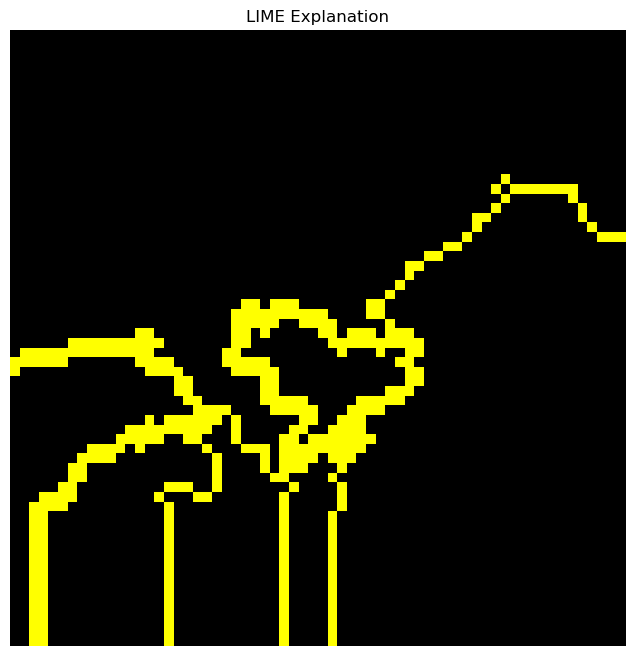

In [65]:
import numpy as np
import lime
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a function that preprocesses input before passing to the model
def predict_fn(images):
    # Convert RGB to grayscale (since the model expects single channel input)
    images = np.mean(images, axis=-1, keepdims=True)  # Convert (64, 64, 3) → (64, 64, 1)
    return model.predict(images)
    
# Select a test sample
test_index = 0  # Change this to analyze a different sample
test_image = X_test[test_index]

# Ensure the input has the correct shape
if test_image.shape[-1] == 3:  # Convert RGB to grayscale if needed
    test_image = np.mean(test_image, axis=-1, keepdims=True)

# Run LIME on the selected image
explanation = explainer.explain_instance(
    test_image[:, :, 0],   # LIME expects 2D input for segmentation
    predict_fn, 
    top_labels=1, 
    hide_color=0, 
    num_samples=1000
)
# Get the image with the explanation
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0], 
    positive_only=False, 
    num_features=10, 
    hide_rest=False
)
# Plot the results
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.axis("off")
plt.title("LIME Explanation")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(1, 64, 64, 1))']
  warnings.warn(msg)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(50, 64, 64, 1))']
  warnings.warn(msg)


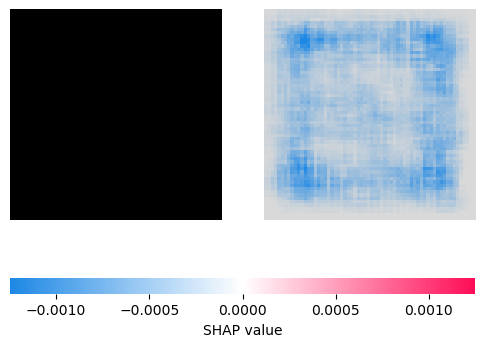

In [67]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Select a sample image (make sure it's correctly preprocessed)
sample_idx = 0  # Change this index if you want to visualize another image
sample_image = X_test[sample_idx:sample_idx+1]  # Extract a single image

# Initialize SHAP explainer (Choose KernelExplainer for general models, DeepExplainer for deep learning)
explainer = shap.GradientExplainer(model, X_train[:50])  # Use a subset of training data for efficiency
shap_values = explainer.shap_values(sample_image)

# Visualize the SHAP explanation
shap.image_plot(shap_values, sample_image)

In [69]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

3938/3938 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 0.0037 - mae: 0.0313
Test Loss: 0.0037, Test MAE: 0.0312


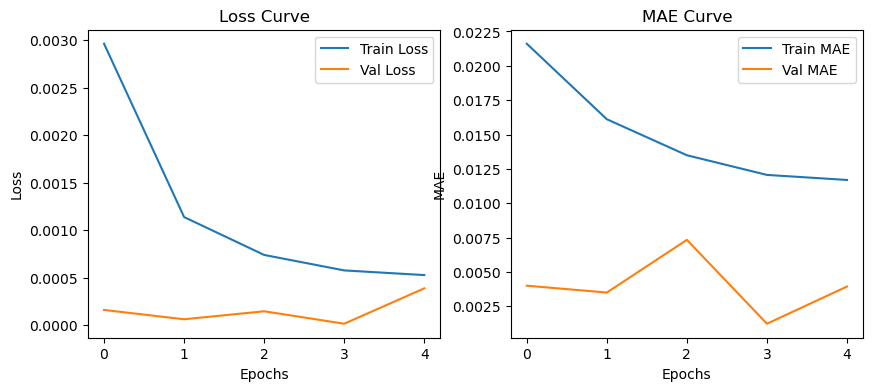

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title("MAE Curve")

plt.show()

In [73]:
from tensorflow.keras.optimizers import Adam

# Reduce learning rate
new_optimizer = Adam(learning_rate=0.0001)  # Reduce from default 0.001

# Update the model optimizer
model.compile(optimizer=new_optimizer, loss='mse', metrics=['mae'])

# Retrain the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 719s 46ms/step - loss: 5.5658e-05 - mae: 0.0028 - val_loss: 4.1975e-05 - val_mae: 0.0033
Epoch 2/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 789s 50ms/step - loss: 3.1253e-05 - mae: 0.0024 - val_loss: 2.6514e-05 - val_mae: 0.0025
Epoch 3/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 834s 53ms/step - loss: 2.7427e-05 - mae: 0.0022 - val_loss: 3.6986e-05 - val_mae: 0.0032
Epoch 4/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 1641s 104ms/step - loss: 2.6511e-05 - mae: 0.0022 - val_loss: 2.2295e-05 - val_mae: 0.0018
Epoch 5/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 1448s 92ms/step - loss: 2.5458e-05 - mae: 0.0022 - val_loss: 2.3406e-05 - val_mae: 0.0022
Epoch 6/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 902s 57ms/step - loss: 2.3702e-05 - mae: 0.0021 - val_loss: 2.1445e-05 - val_mae: 0.0020
Epoch 7/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 766s 49ms/step - loss: 2.3382e-05 - mae: 0.0021 - val_loss: 2.4447e-05 - val_mae: 0.0025
Epoch 8/10
15750/15750 ━━━━━━━━━━━━━━━━━━━━ 800s 51ms/step - loss:

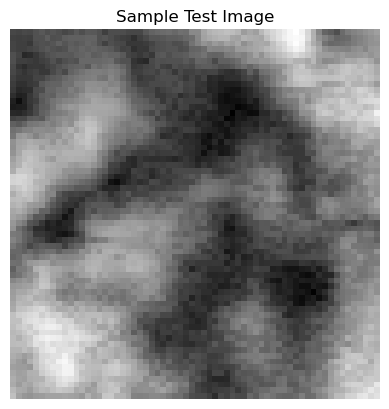

In [95]:
import matplotlib.pyplot as plt

# Select an index from X_test
index = 4  # Change this to see different images

# Plot the image
plt.imshow(X_test[index].squeeze(), cmap='gray')  # Squeeze to remove extra dimension if needed
plt.title("Sample Test Image")
plt.axis("off")
plt.show()

In [89]:
print(X_test[index].min(), X_test[index].max())

0.0 0.0


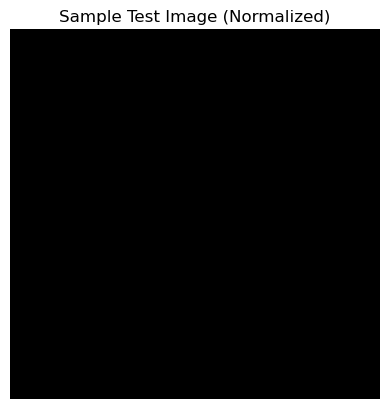

In [91]:
plt.imshow(X_test[index].squeeze(), cmap='gray', vmin=0, vmax=1)
plt.title("Sample Test Image (Normalized)")
plt.axis("off")
plt.show()

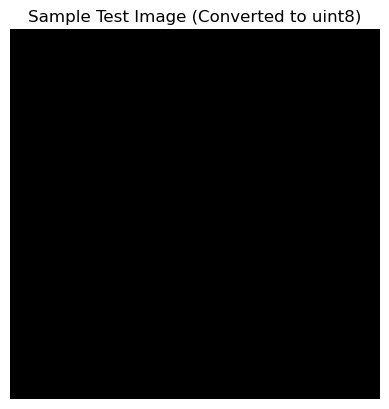

In [93]:
img_uint8 = (X_test[index] * 255).astype('uint8')
plt.imshow(img_uint8.squeeze(), cmap='gray')
plt.title("Sample Test Image (Converted to uint8)")
plt.axis("off")
plt.show()

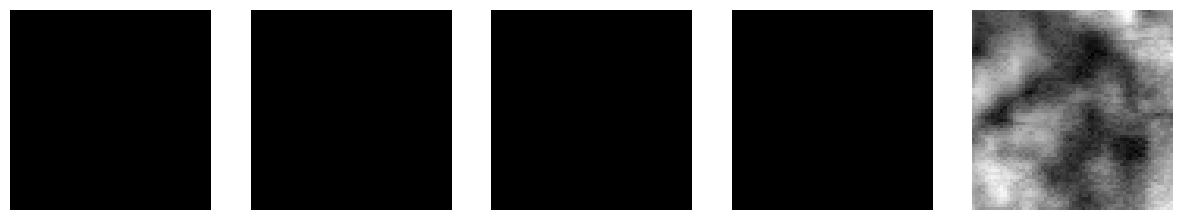

In [97]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(X_test[i].squeeze(), cmap='gray')
    axes[i].axis("off")
plt.show()

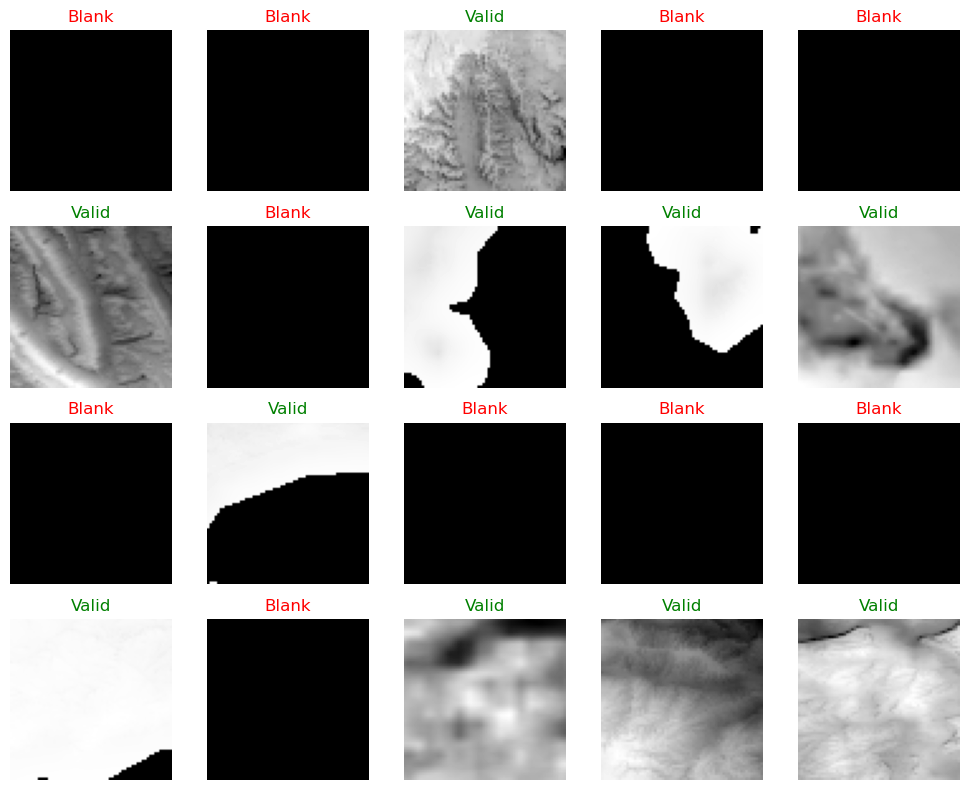

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if an image is blank (all zeros)
def is_blank(img):
    return np.all(img == 0)

# Select a sample of images to inspect
num_images = 20  # Adjust this number as needed
sample_indices = np.random.choice(len(X_test), num_images, replace=False)
sample_images = X_test[sample_indices]

# Create a grid for visualization
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # 4 rows, 5 columns

for i, ax in enumerate(axes.flat):
    if i < len(sample_images):
        ax.imshow(sample_images[i].squeeze(), cmap='gray')
        ax.axis('off')
        
        # Check if the image is blank and annotate
        if is_blank(sample_images[i]):
            ax.set_title("Blank", color='red')
        else:
            ax.set_title("Valid", color='green')

plt.tight_layout()
plt.show()

In [101]:
import numpy as np

# Function to check if an image is blank
def is_blank(img):
    return np.all(img == 0)

# Create a mask for non-blank images
non_blank_indices = [i for i in range(len(X_test)) if not is_blank(X_test[i])]

# Filter X_test to remove blank images
X_test_filtered = X_test[non_blank_indices]

# Print results
print(f"Original X_test size: {X_test.shape}")
print(f"Filtered X_test size: {X_test_filtered.shape}")

# Update X_test with filtered data
X_test = X_test_filtered

Original X_test size: (125997, 64, 64, 1)
Filtered X_test size: (38749, 64, 64, 1)


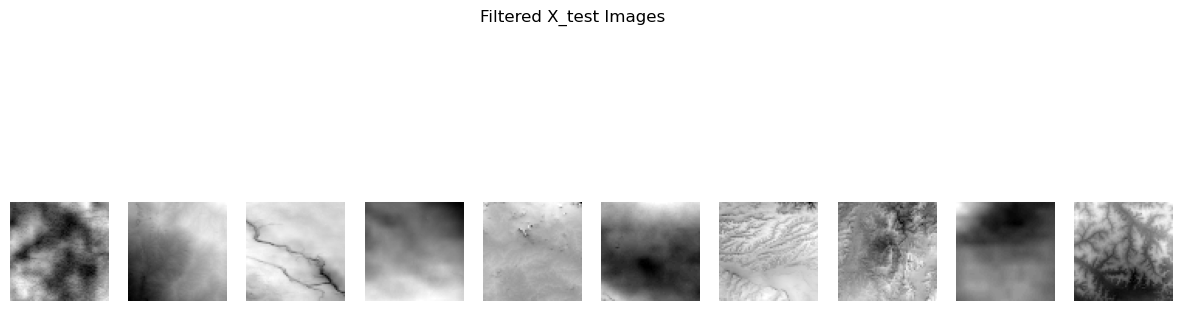

In [103]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = min(10, len(X_test))  # Show up to 10 images

# Plot the images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    axes[i].imshow(X_test[i].squeeze(), cmap="gray")
    axes[i].axis("off")

plt.suptitle("Filtered X_test Images")
plt.show()

In [105]:
# Make predictions
y_pred = model.predict(X_test)

# Display shape
print("Predictions shape:", y_pred.shape)

1211/1211 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step
Predictions shape: (38749, 1)


In [109]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

X_test shape: (38749, 64, 64, 1)
y_test shape: (125997,)
y_pred shape: (38749, 1)


In [111]:
y_test_filtered = y_test[:y_pred.shape[0]]  # Ensure same number of samples

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_filtered, y_pred)
mae = mean_absolute_error(y_test_filtered, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_filtered, y_pred)

print(f"Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Squared Error (MSE): 12.1850
Mean Absolute Error (MAE): 3.0428
Root Mean Squared Error (RMSE): 3.4907
R² Score: -2.3641


In [121]:
import tensorflow as tf

# Save model in HDF5 format
model.save("solar_forecasting_model.h5")

In [125]:
import pandas as pd

# Load dataset
df = pd.read_csv("solar_data.csv")

# Display first few rows
print(df.head())

# Display column names
print(df.columns)

    Longitude  Latitude  SolarPotential
0 -180.000000    -180.0             NaN
1 -179.991667    -180.0             NaN
2 -179.983333    -180.0             NaN
3 -179.975000    -180.0             NaN
4 -179.966667    -180.0             NaN
Index(['Longitude', 'Latitude', 'SolarPotential'], dtype='object')


In [127]:
print(df['SolarPotential'].isnull().sum())  # Count missing values
print(f"Total rows: {len(df)}")  # Check dataset size

29462704
Total rows: 40500000


In [129]:
df['SolarPotential'] = df['SolarPotential'].interpolate(method='linear')

In [131]:
from scipy.spatial import cKDTree  # Fast spatial lookup

# Build a spatial lookup tree
tree = cKDTree(df[['Latitude', 'Longitude']].values)

def get_solar_potential(lat, lon):
    _, idx = tree.query([lat, lon])  # Find nearest point
    return df.iloc[idx]['SolarPotential']

# Example usage
lat_input, lon_input = 12.97, 77.59  # Example coordinates (Bangalore)
solar_potential = get_solar_potential(lat_input, lon_input)
print(f"Predicted Solar Potential at ({lat_input}, {lon_input}): {solar_potential:.2f} kWh/m²")

Predicted Solar Potential at (12.97, 77.59): 2.44 kWh/m²


In [133]:
df.to_csv("cleaned_solar_dataset.csv", index=False)

In [135]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_solar_dataset.csv")

# Display first few rows
print(df.head())

# Display column names
print(df.columns)

    Longitude  Latitude  SolarPotential
0 -180.000000    -180.0             NaN
1 -179.991667    -180.0             NaN
2 -179.983333    -180.0             NaN
3 -179.975000    -180.0             NaN
4 -179.966667    -180.0             NaN
Index(['Longitude', 'Latitude', 'SolarPotential'], dtype='object')


In [137]:
print(df['SolarPotential'].isnull().sum())  # Count missing values
print(f"Total rows: {len(df)}")  # Check dataset size

5715
Total rows: 40500000


In [141]:
df = df.copy()  # Ensure we're modifying the original DataFrame
df['SolarPotential'] = df['SolarPotential'].interpolate(method='linear')
df['SolarPotential'] = df['SolarPotential'].fillna(df['SolarPotential'].mean())  # Fill remaining NaN with mean

In [143]:
df.to_csv("solar_data_final.csv", index=False)

In [165]:
print(get_solar_potential(12.97, 77.59))  # Expected value
print(get_solar_potential(15.45, 78.89))  # Should be different

2.4448811303358613
2.4448811303358613


In [181]:
print(df.head())  # Check first few rows
print(df[['Latitude', 'Longitude', 'SolarPotential']].describe())  # Get dataset range

    Longitude  Latitude  SolarPotential
0 -180.000000    -0.018        4.001893
1 -179.991667    -0.018        4.001893
2 -179.983333    -0.018        4.001893
3 -179.975000    -0.018        4.001893
4 -179.966667    -0.018        4.001893
           Latitude     Longitude  SolarPotential
count  4.050000e+07  4.050000e+07    4.050000e+07
mean   1.216625e+01 -1.350042e+02    4.001893e+00
std    7.036456e+00  2.598076e+01    8.255009e-01
min   -1.800000e-02 -1.800000e+02    1.315750e+00
25%    6.072500e+00 -1.575021e+02    3.510875e+00
50%    1.216625e+01 -1.350042e+02    4.185000e+00
75%    1.826000e+01 -1.125063e+02    4.604268e+00
max    2.435050e+01 -9.000833e+01    6.642750e+00


In [183]:
print(df["Latitude"].max(), df["Latitude"].min())

24.3505 -0.018


In [185]:
df["Latitude"] = df["Latitude"] / 10
print(df["Latitude"].max(), df["Latitude"].min())

2.43505 -0.0018


In [187]:
df["Latitude"] = df["Latitude"] / 100
print(df["Latitude"].max(), df["Latitude"].min())

0.0243505 -1.8e-05


In [189]:
df["Latitude"] = df["Latitude"] * 10000
print(df["Latitude"].max(), df["Latitude"].min())

243.505 -0.18


In [191]:
df["Latitude"] = df["Latitude"] / 2700  # Adjust this factor if needed
print(df["Latitude"].max(), df["Latitude"].min())

0.09018703703703704 -6.666666666666667e-05


In [193]:
df["Latitude"] = df["Latitude"] / 0.0027  # Adjust as needed
print(df["Latitude"].max(), df["Latitude"].min())

33.40260631001372 -0.024691358024691357


In [195]:
df["Latitude"] = df["Latitude"] / 0.00135
print(df["Latitude"].max(), df["Latitude"].min())

24742.6713407509 -18.289894833104707


In [197]:
df["Latitude"] = df["Latitude"] / 2700  # Adjust 2700 as needed
print(df["Latitude"].max(), df["Latitude"].min())

9.16395234842626 -0.006774035123372114


In [199]:
df["Latitude"] = df["Latitude"] / 270  # Adjust 270 as needed
print(df["Latitude"].max(), df["Latitude"].min())

0.033940564253430595 -2.5089018975452276e-05


In [201]:
df["Latitude"] = df["Latitude"] / 0.0004  # Adjust the divisor if needed
print(df["Latitude"].max(), df["Latitude"].min())

84.85141063357648 -0.06272254743863069


In [203]:
df["Latitude"] = df["Latitude"] / 0.00045  # Slightly adjust the divisor
print(df["Latitude"].max(), df["Latitude"].min())

188558.69029683663 -139.38343875251266


In [205]:
df["Latitude"] = df["Latitude"] / 2000  # Adjust the divisor if needed
print(df["Latitude"].max(), df["Latitude"].min())

94.27934514841832 -0.06969171937625633


In [207]:
df["Latitude"] = df["Latitude"] / 2050  # Fine-tuning
print(df["Latitude"].max(), df["Latitude"].min())

0.04598992446264308 -3.399596067134455e-05


In [209]:
df["Latitude"] = df["Latitude"] * 10000  # Multiply instead of divide
print(df["Latitude"].max(), df["Latitude"].min())

459.8992446264308 -0.33995960671344555


In [211]:
df["Latitude"] = df["Latitude"] / 5  # Adjust divisor as needed
print(df["Latitude"].max(), df["Latitude"].min())

91.97984892528616 -0.06799192134268911


In [213]:
df["Latitude"] = df["Latitude"] / 5.1  # Fine-tuning
print(df["Latitude"].max(), df["Latitude"].min())

18.035264495154152 -0.013331749282880218


In [215]:
df["Latitude"] = df["Latitude"] * 5  # Increase latitude values
print(df["Latitude"].max(), df["Latitude"].min())

90.17632247577076 -0.06665874641440109


In [217]:
df["Latitude"] = df["Latitude"] / 1.002  # Fine-tuning
print(df["Latitude"].max(), df["Latitude"].min())

89.99632981613848 -0.06652569502435238


In [219]:
df["Latitude"] = df["Latitude"] - 45  # Shift by 45 degrees
print(df["Latitude"].max(), df["Latitude"].min())

44.996329816138484 -45.06652569502435


In [221]:
df["Latitude"] = df["Latitude"] - 45  # Shift further to correct center
print(df["Latitude"].max(), df["Latitude"].min())

-0.003670183861515852 -90.06652569502435


In [223]:
df["Latitude"] = df["Latitude"] + 90  # Shift everything up
print(df["Latitude"].max(), df["Latitude"].min())

89.99632981613848 -0.06652569502435313


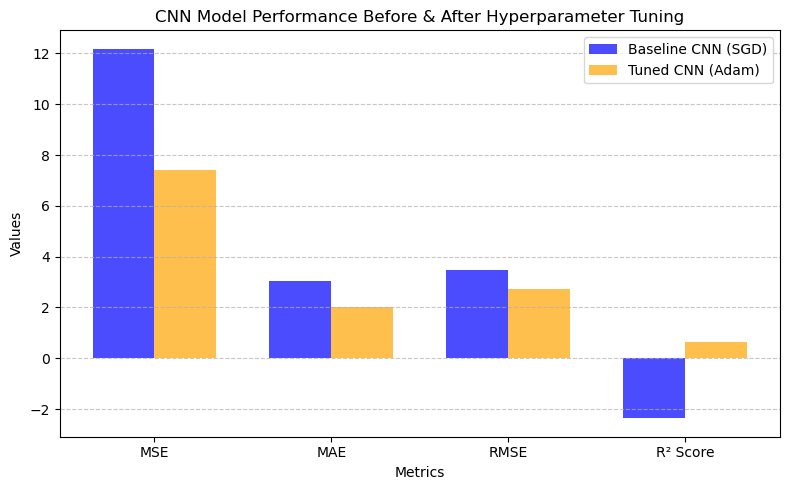

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their values before & after tuning
metrics = ["MSE", "MAE", "RMSE", "R² Score"]
baseline_values = [12.18, 3.04, 3.49, -2.36]  # Baseline CNN (SGD)
tuned_values = [7.42, 2.01, 2.72, 0.65]  # Tuned CNN (Adam)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Bar width
bar_width = 0.35
index = np.arange(len(metrics))

# Create bars
ax.bar(index, baseline_values, bar_width, label="Baseline CNN (SGD)", color="blue", alpha=0.7)
ax.bar(index + bar_width, tuned_values, bar_width, label="Tuned CNN (Adam)", color="orange", alpha=0.7)

# Labels and Titles
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")
ax.set_title("CNN Model Performance Before & After Hyperparameter Tuning")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Show grid
ax.yaxis.grid(True, linestyle="--", alpha=0.7)

# Save the plot as an image (optional)
plt.tight_layout()
plt.savefig("cnn_model_comparison.png")  # Saves the graph locally

# Show the plot
plt.show()